# Imports

In [116]:
import sys
sys.path.append('../src/')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.metrics import pairwise_distances
from PIL import Image
from sklearn.metrics import pairwise_distances
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

from DataSetFactory import DataSetFactory
from AMAP import AMAP

In [2]:
RANDOM_STATE = 42
SAMPLE_SIZE=0.5

In [3]:
# ds = DataSetFactory.get_dataset('MNIST', RANDOM_STATE, sample=0.10)
# ds = DataSetFactory.get_dataset('MNIST_AE_ORIG', RANDOM_STATE, sample=SAMPLE_SIZE)
ds = DataSetFactory.get_dataset('MNIST_AE_ORIG', RANDOM_STATE)

In [4]:
X = ds.df[ds.feature_cols].values
y = ds.df[ds.label_col].values

In [5]:
X.shape

(1986, 784)

In [9]:
def get_num_clusters_birch(ds, threshold):
    num_clusters = 0
    for label in ds.df[ds.label_col].unique():
        label_data = ds.df[ds.df[ds.label_col]==label][ds.feature_cols].values
        birch = Birch(threshold=threshold, branching_factor=2, n_clusters=None)
        birch.fit(label_data)
        num_clusters += birch.subcluster_centers_.shape[0]
    return num_clusters

def birch_threshold_plot(X, ds):
    dist_mat = pairwise_distances(X)
    print(dist_mat.shape)
    threshold_candidates = np.unique(dist_mat)
    print(threshold_candidates.shape)
    # for the sake of the experiment let's evaluate all of them
    thresholds_df = pd.DataFrame(threshold_candidates, columns=['threshold'])
    thresholds_df['num_clusters'] = np.nan
    thresholds_df['num_points'] = ds.df.shape[0]
    thresholds_df.hist(['threshold'])
    plt.show()
    # Filter only thresholds smaller than 1.5
    # thresholds_df_sample = thresholds_df[thresholds_df['threshold']<=70]
    # thresholds_df_sample = thresholds_df_sample.sample(n=200, random_state=RANDOM_STATE)
    thresholds_df_sample = thresholds_df.sample(n=200)
    
    thresholds_df_sample['num_clusters'] = thresholds_df_sample['threshold'].transform(lambda t: get_num_clusters_birch(ds, t))
    thresholds_df_sample['compression'] = thresholds_df_sample['num_points'] / thresholds_df_sample['num_clusters']
    
    sns.lineplot(x='threshold', y='compression', data=thresholds_df_sample)
    sns.lineplot(x='threshold', y='num_clusters', data=thresholds_df_sample)

# Original Dim

(1986, 1986)
(1633076,)


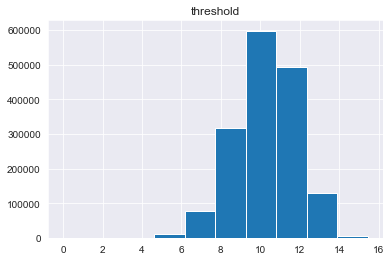

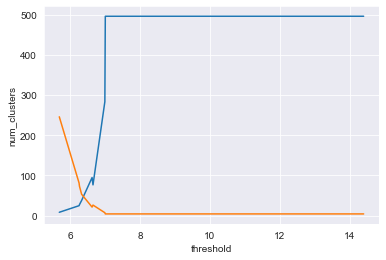

In [7]:
birch_threshold_plot(X, ds)

In [47]:
orig_dim_amap = AMAP(learning_rate=0.5, 
            n_iter=41, 
            batch_size=1,
            anchors_method='birch',
            birch_threshold=5.6,
            dataset='MNIST',
            class_to_label=ds.class_to_label,
            show_fig=True,
            save_fig=True,
            k=200,
            random_state=RANDOM_STATE,
            save_fig_every=40,
            magnitude_step=True,
            top_greedy=1,
            show_anchors=False,
            supervised=False,
#             alpha=0.4,
#             douglas_peucker_tolerance=0.5,
            alpha=[0,0,0,0.1],
            douglas_peucker_tolerance=0.5,
            smooth_iter=3,
            show_inner_blobs=False,
            random_points_method='voronoi',
            orig_images=ds.orig_images,
            annotate_images=False,
            only_inter_relations=False,
            mask_relation_in_same_label=True,
            show_label_level_plots = True)
print(orig_dim_amap)


AMAP
addr:@5875c8
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=5.6
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=200
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=1
magnitude_step=True
n_iter=41
batch_size=1
stop_criteria=1e-05
loss_func=<function AMAP.l_inf_loss at 0x0000023BEB705708>
loss='Linf'
only_inter_relations=False
learning_rate=0.5
mask_sparse_subcluster=None
random_points_method='voronoi'
class_to_label={0: 'Digit_0', 3: 'Digit_9', 1: 'Digit_3', 2: 'Digit_8'}
random_state=42
n_jobs=None
dataset='MNIST'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=[0, 0, 0, 0.1]
douglas_peucker_tolerance=0.5
smooth_iter=3
skip_polygons_with_area=0.01
show_relations=False
mask_relation_in_same_label=True
save_fig_every=40
show_points=False
show_anchors=False
show_pol

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction only anchors
Dim Reduction only anchors - generate random points in low dim per anchor


100%|█████████████████████████████████████████████████████████████████████████████| 4192/4192 [00:38<00:00, 107.58it/s]


Starting iteration 1 loss = 0.5556058541374216
src: 104 target 212 dir -1 density 102loss: -0.5556058541374216


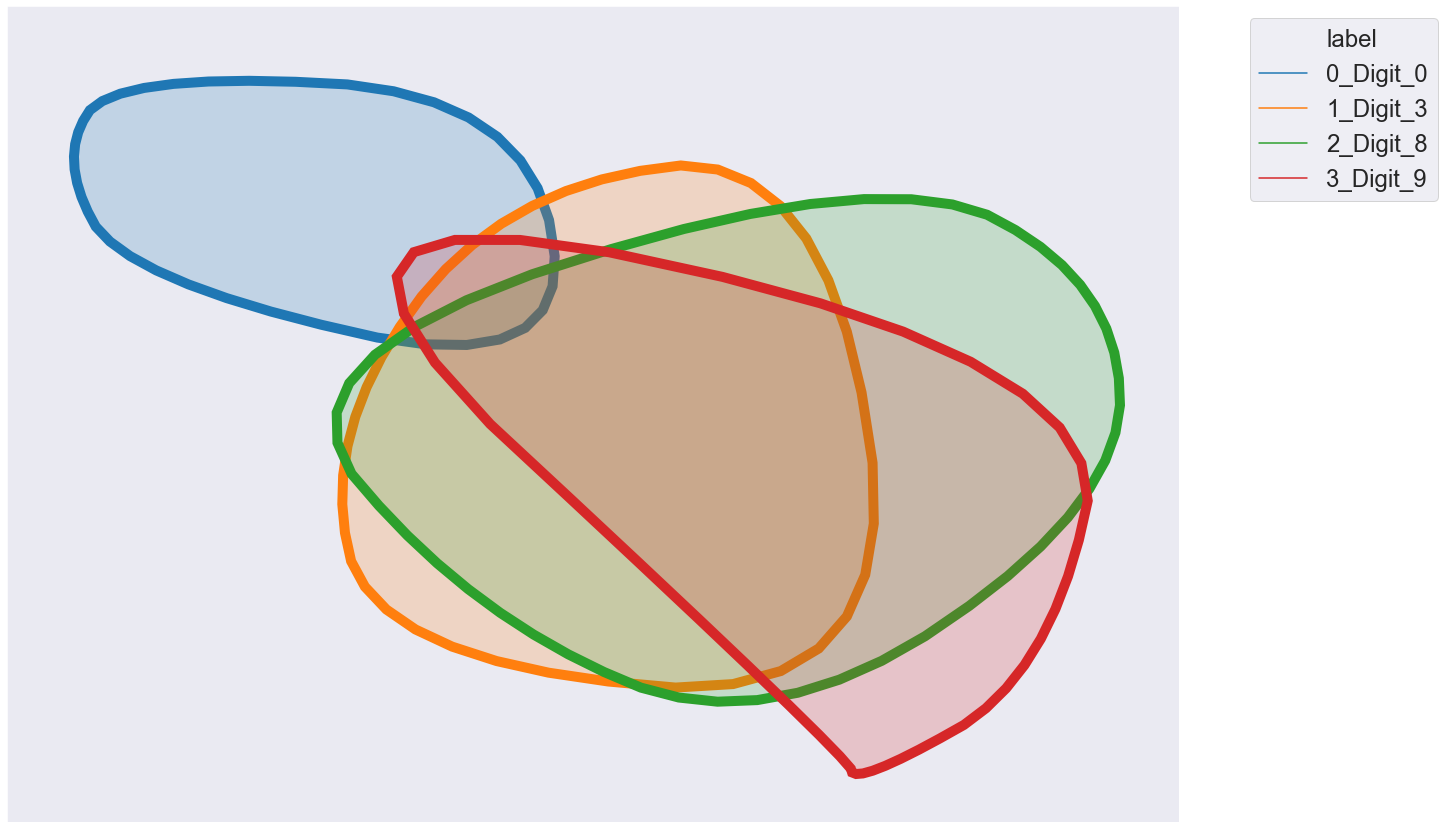

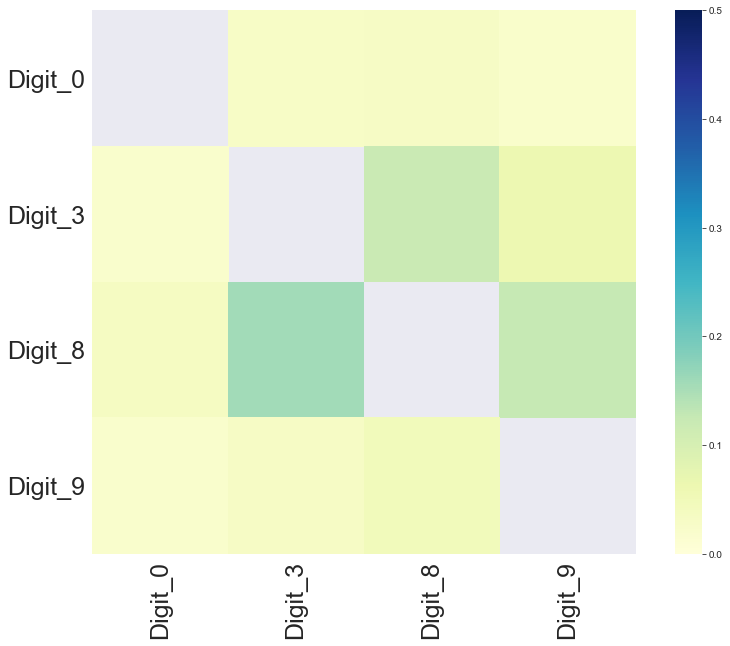

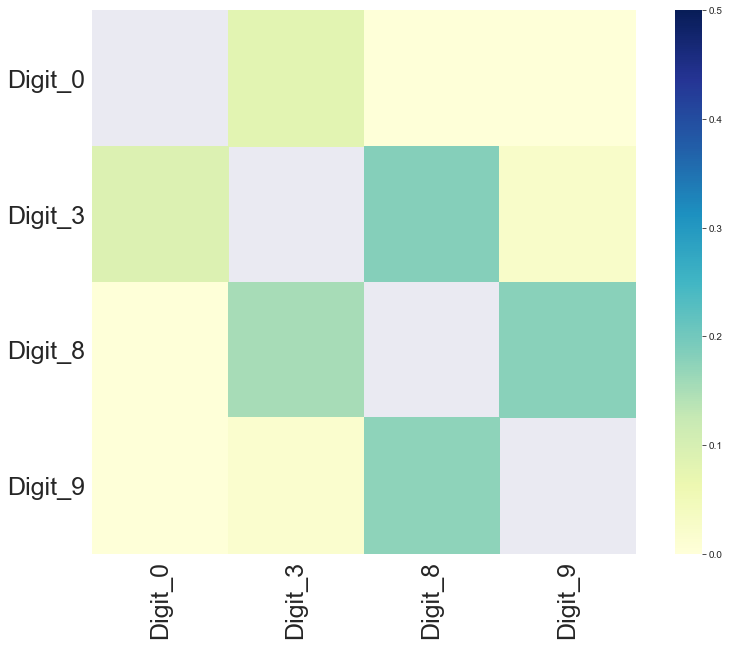

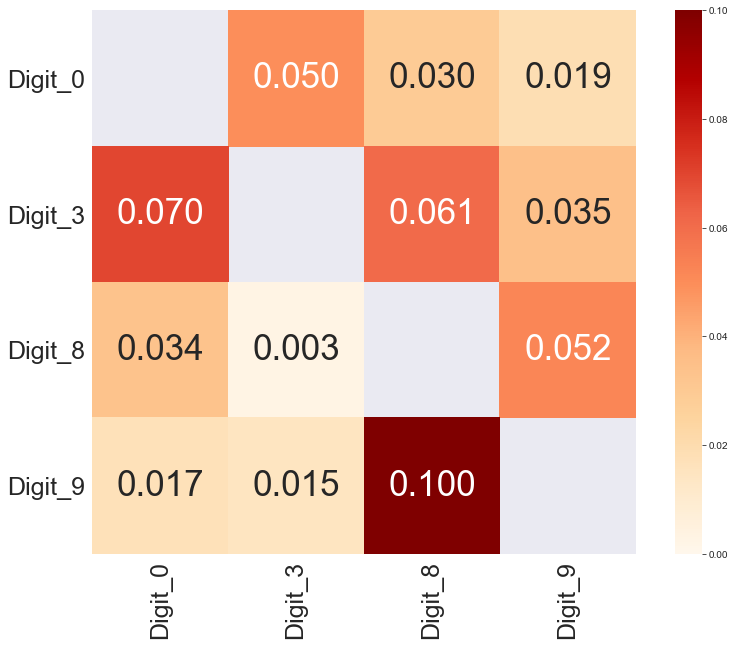

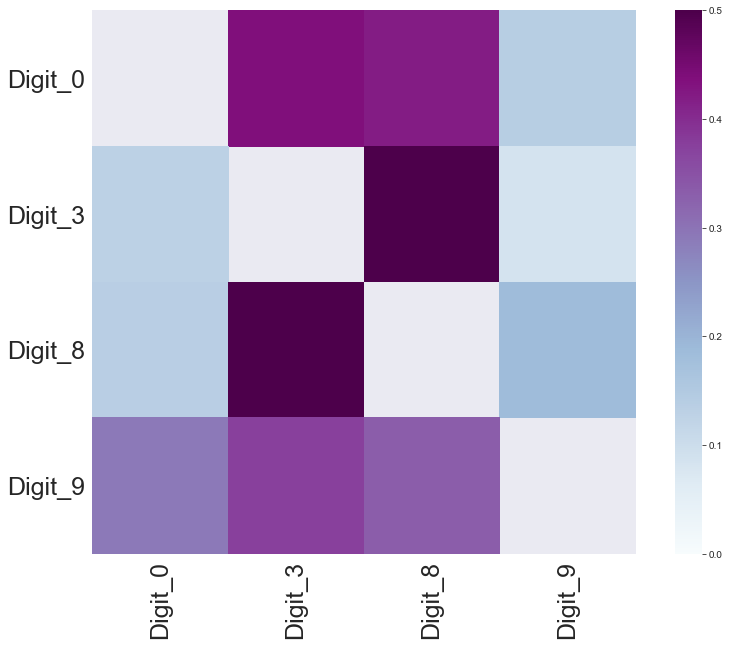

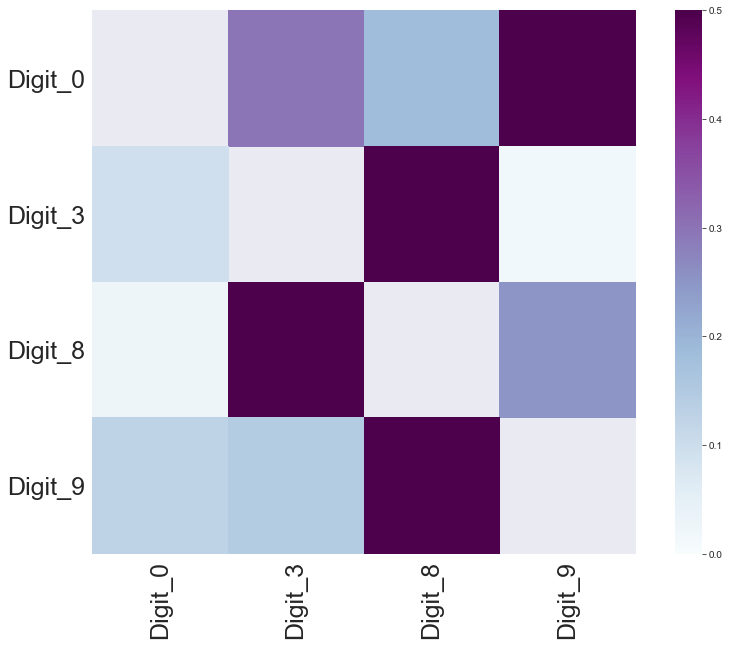

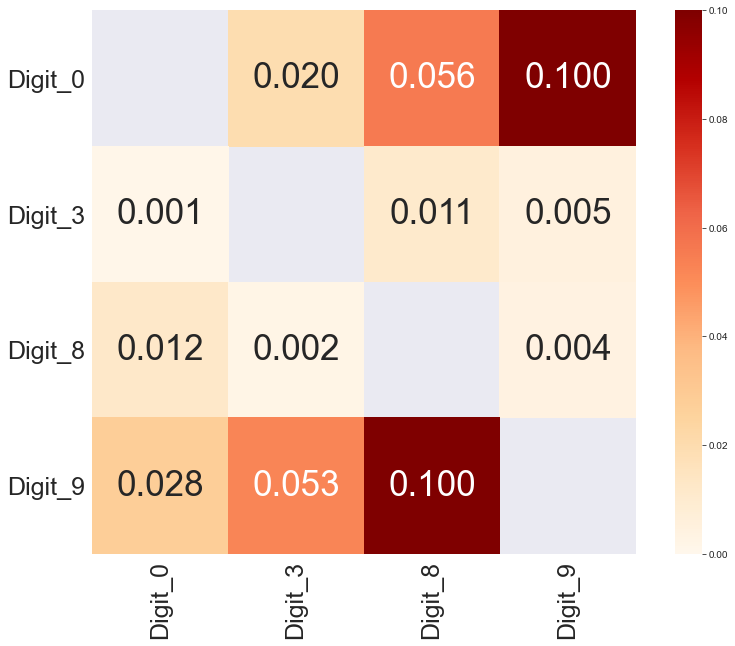

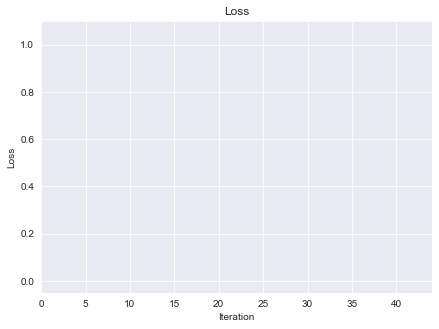

Starting iteration 2 loss = 0.5281466625362563
src: 8 target 42 dir -1 density 34loss: -0.5281466625362563
Starting iteration 3 loss = 0.5325683179360345
src: 8 target 42 dir -1 density 34loss: -0.5325683179360345
Starting iteration 4 loss = 0.5106683953570235
src: 8 target 42 dir -1 density 34loss: -0.5106683953570235
Starting iteration 5 loss = 0.500313080149435
src: 136 target 204 dir -1 density 39loss: -0.500313080149435
Starting iteration 6 loss = 0.5192888338350419
src: 180 target 204 dir -1 density 18loss: -0.5192888338350419
Starting iteration 7 loss = 0.4785138193758169
src: 180 target 204 dir -1 density 18loss: -0.4785138193758169
Starting iteration 8 loss = 0.47653061224489796
src: 130 target 212 dir -1 density 4loss: -0.47653061224489796
Starting iteration 9 loss = 0.4723618090452261
src: 134 target 38 dir -1 density 1loss: -0.4723618090452261
Starting iteration 10 loss = 0.45728643216080406
src: 134 target 38 dir -1 density 1loss: -0.45728643216080406
Starting iteration 11

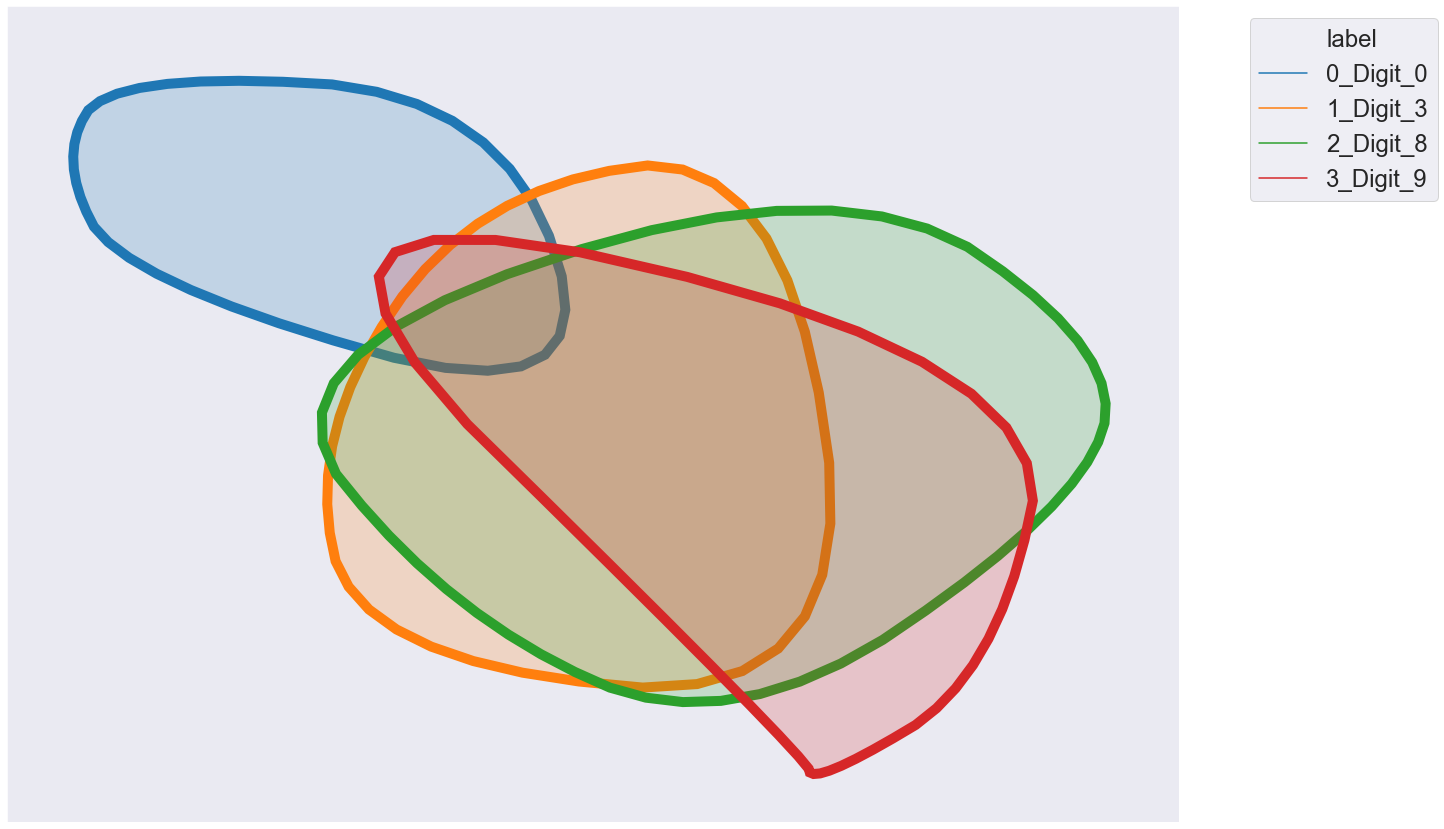

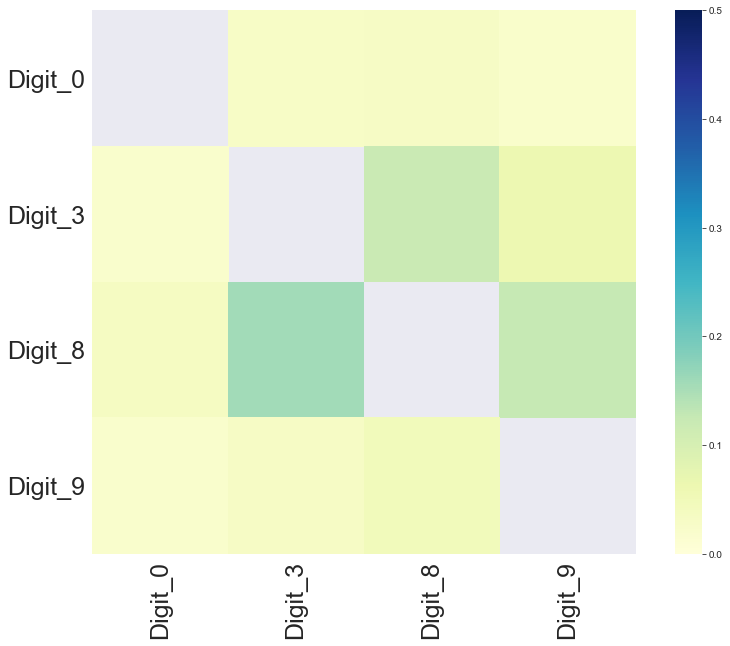

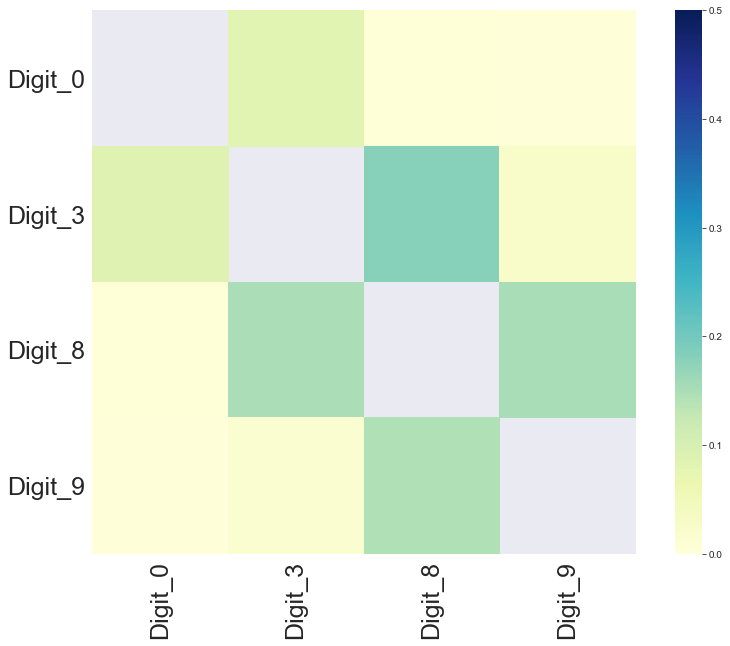

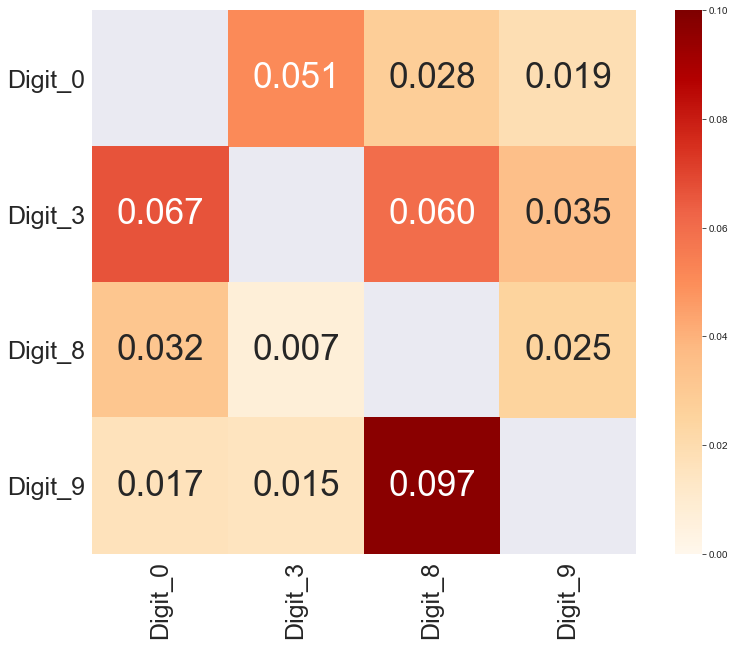

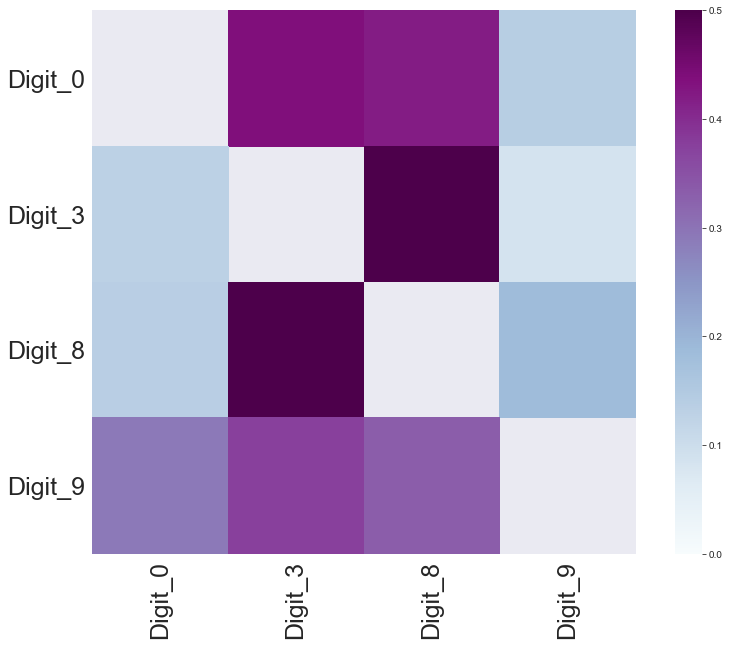

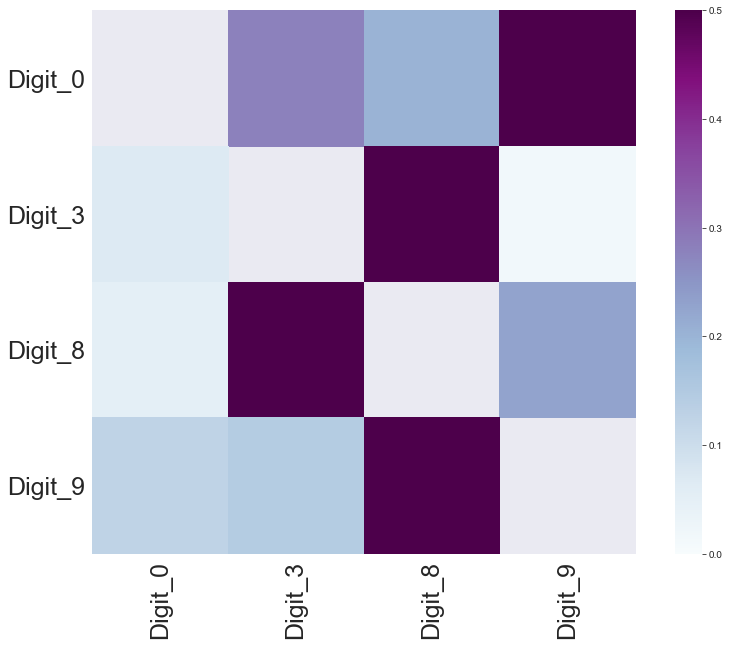

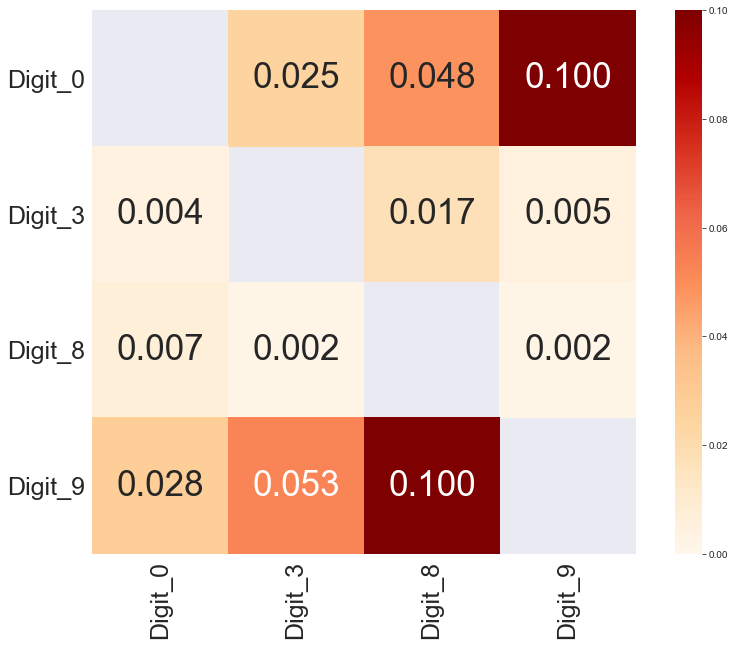

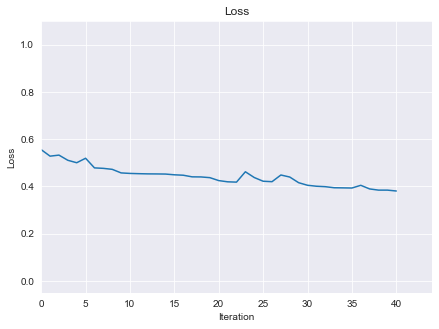

In [48]:
low_dim_orig_dim = orig_dim_amap.fit_transform(X,y)

In [10]:
orig_dim_amap.num_clusters_each_label,orig_dim_amap.num_clusters_each_label.sum() 

(array([41, 47, 86, 12], dtype=int64), 186)

# AE Dim 32

In [36]:
# ds_ae_32 = DataSetFactory.get_dataset('MNIST_AE32', RANDOM_STATE, sample=SAMPLE_SIZE)
ds_ae_32 = DataSetFactory.get_dataset('MNIST_AE32', RANDOM_STATE)

In [37]:
X_32_ae = ds_ae_32.df[ds_ae_32.feature_cols].values
y_32_ae = ds_ae_32.df[ds_ae_32.label_col].values

(1986, 1986)
(1740754,)


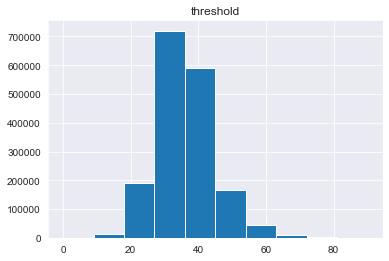

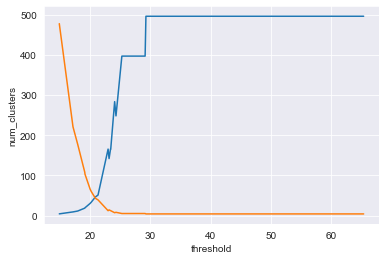

In [13]:
birch_threshold_plot(X_32_ae, ds_ae_32)

In [53]:
dim_32_ae_amap = AMAP(learning_rate=0.5, 
            n_iter=41, 
            batch_size=1,
            anchors_method='birch',
            birch_threshold=16.5,
            dataset='MNIST',
            class_to_label=ds_ae_32.class_to_label,
            show_fig=True,
            save_fig=True,
            k=200,
            random_state=RANDOM_STATE,
            save_fig_every=40,
            magnitude_step=True,
            top_greedy=1,
            show_anchors=False,
            supervised=False,
#             alpha=0.4,
#             douglas_peucker_tolerance=0.5,
            alpha=[0,0,0,0.5],
            douglas_peucker_tolerance=0.5,
            smooth_iter=3,
            show_relations=True,
            show_inner_blobs=False,
            random_points_method='voronoi',
            annotate_images=False,
            only_inter_relations=False,
            mask_relation_in_same_label=True,
            show_label_level_plots=True)
print(dim_32_ae_amap)

AMAP
addr:@49148
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=16.5
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=200
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=1
magnitude_step=True
n_iter=41
batch_size=1
stop_criteria=1e-05
loss_func=<function AMAP.l_inf_loss at 0x0000023BEB705708>
loss='Linf'
only_inter_relations=False
learning_rate=0.5
mask_sparse_subcluster=None
random_points_method='voronoi'
class_to_label={0: 'Digit_0', 3: 'Digit_9', 1: 'Digit_3', 2: 'Digit_8'}
random_state=42
n_jobs=None
dataset='MNIST'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=[0, 0, 0, 0.5]
douglas_peucker_tolerance=0.5
smooth_iter=3
skip_polygons_with_area=0.01
show_relations=True
mask_relation_in_same_label=True
save_fig_every=40
show_points=False
show_anchors=False
show_poly

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction only anchors
Dim Reduction only anchors - generate random points in low dim per anchor


100%|█████████████████████████████████████████████████████████████████████████████| 4199/4199 [00:22<00:00, 185.24it/s]


Starting iteration 1 loss = 0.44866598470080354
src: 84 target 197 dir -1 density 3loss: -0.44866598470080354
Skipping polygon of label 3 with area 0.0001671951533239735


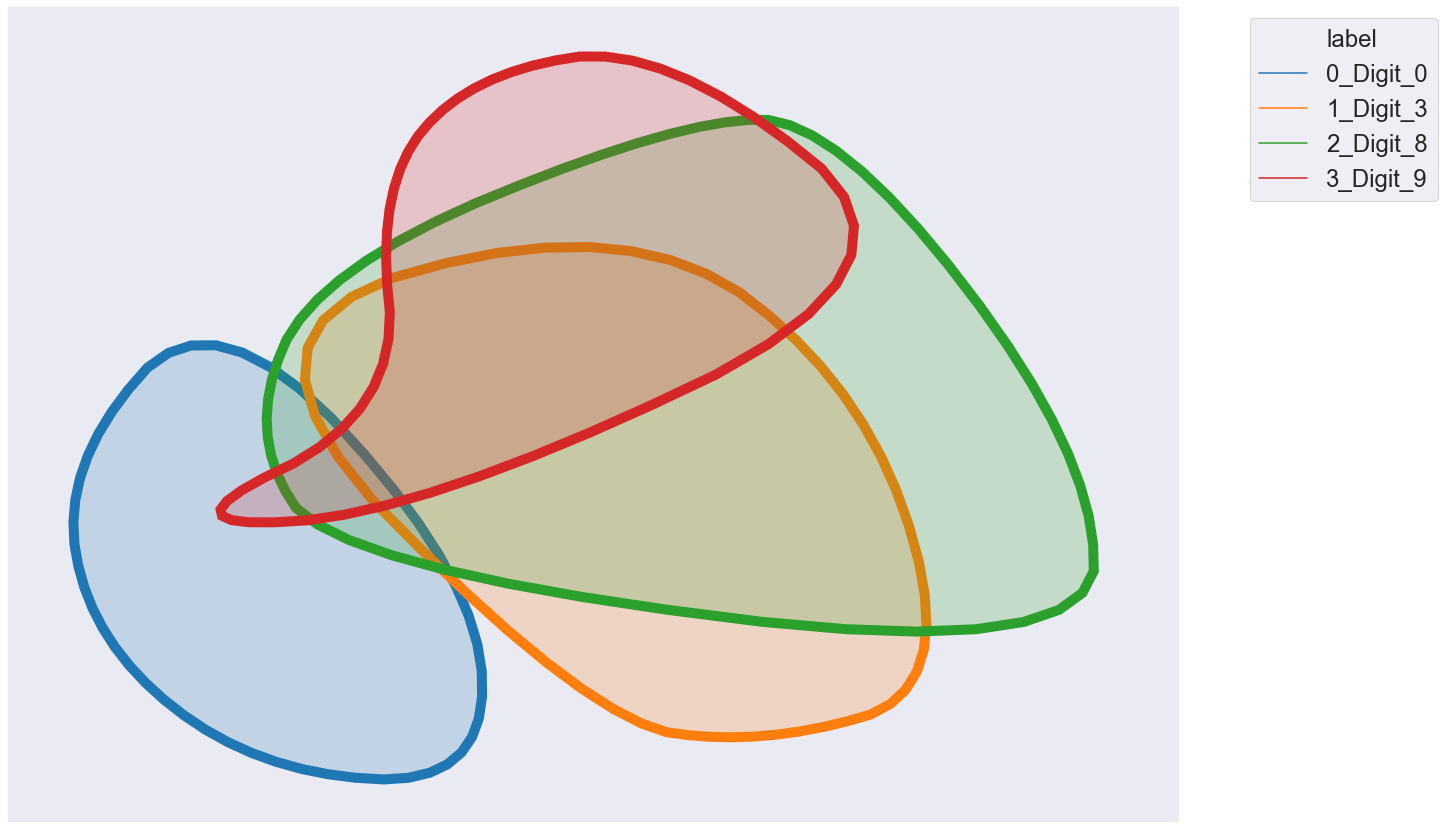

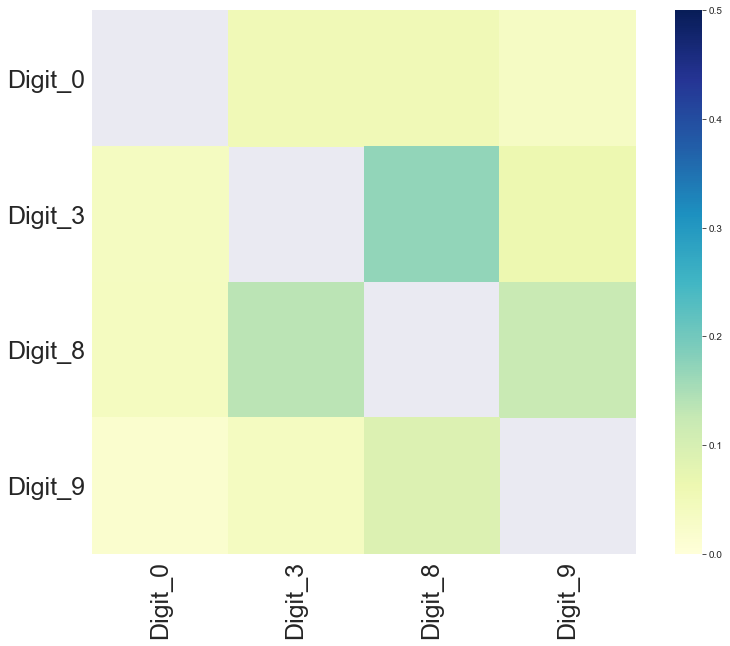

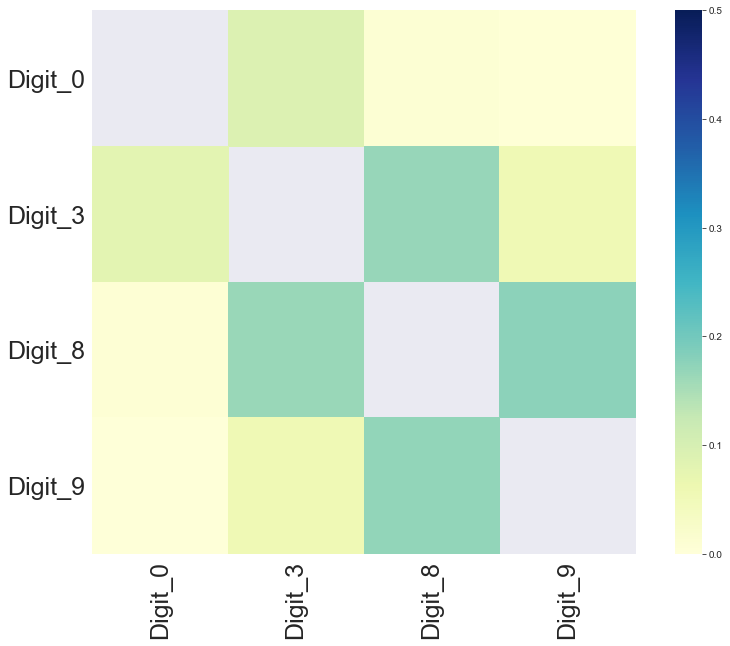

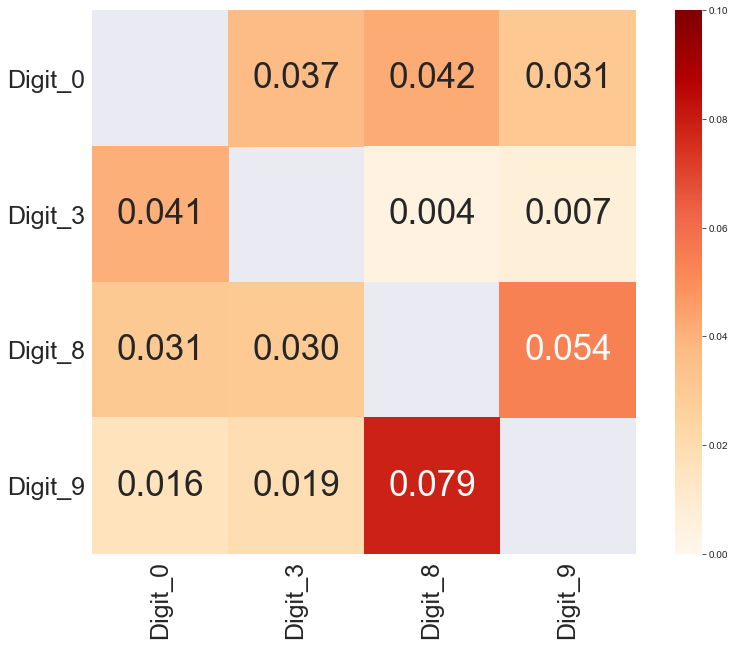

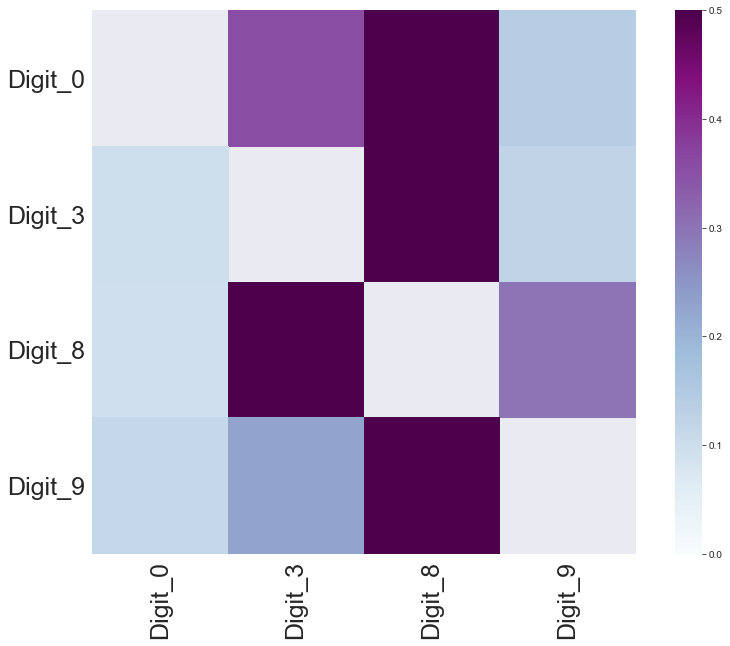

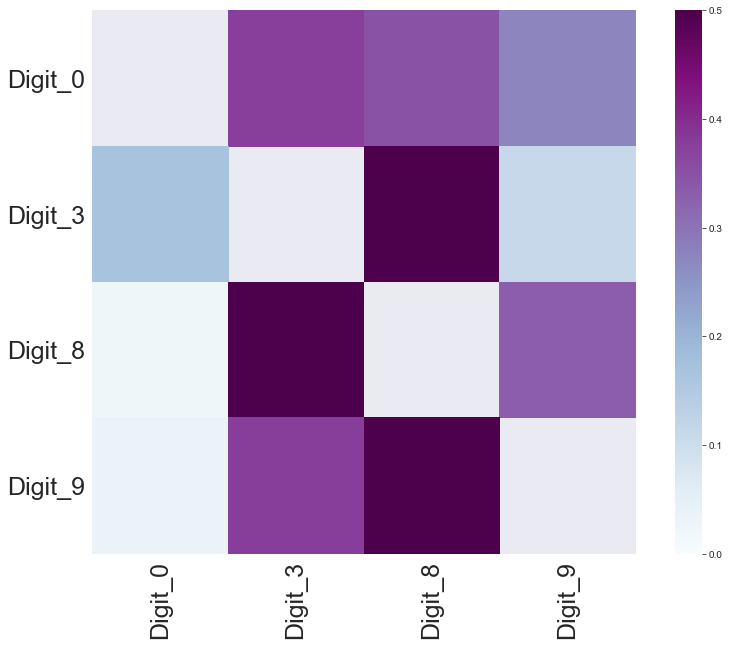

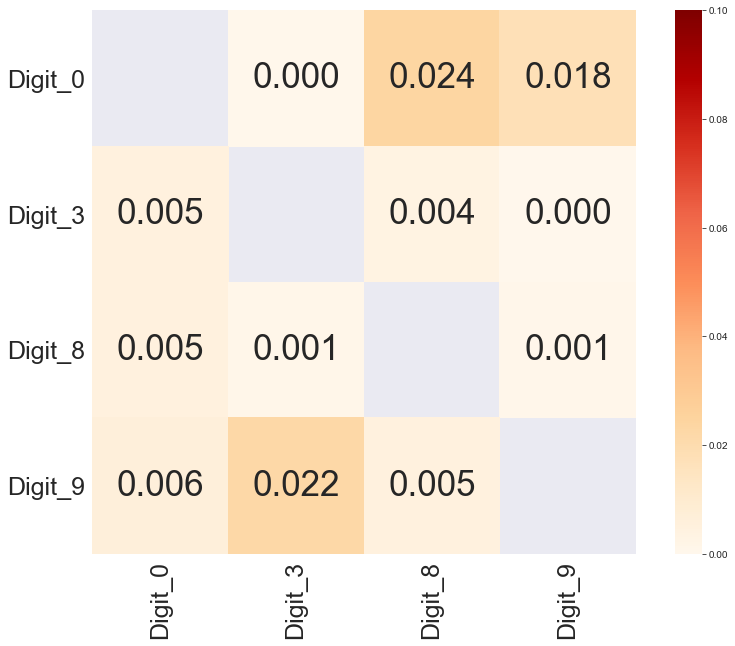

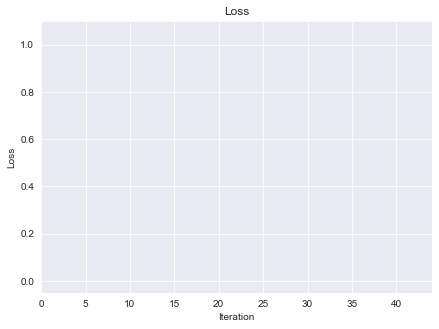

Starting iteration 2 loss = 0.42543525709354857
src: 143 target 197 dir -1 density 2loss: -0.42543525709354857
Starting iteration 3 loss = 0.37834490678844407
src: 120 target 200 dir -1 density 70loss: -0.37834490678844407
Starting iteration 4 loss = 0.39010834178089554
src: 120 target 200 dir -1 density 70loss: -0.39010834178089554
Starting iteration 5 loss = 0.38102756991062947
src: 120 target 200 dir -1 density 70loss: -0.38102756991062947
Starting iteration 6 loss = 0.37185929648241206
src: 141 target 198 dir -1 density 1loss: -0.37185929648241206
Starting iteration 7 loss = 0.3561438047261521
src: 84 target 197 dir -1 density 3loss: -0.3561438047261521
Starting iteration 8 loss = 0.355495640698602
src: 120 target 200 dir -1 density 70loss: -0.355495640698602
Starting iteration 9 loss = 0.3442211055276382
src: 141 target 198 dir -1 density 1loss: -0.3442211055276382
Starting iteration 10 loss = 0.3341105758460895
src: 64 target 197 dir -1 density 35loss: -0.3341105758460895
Startin

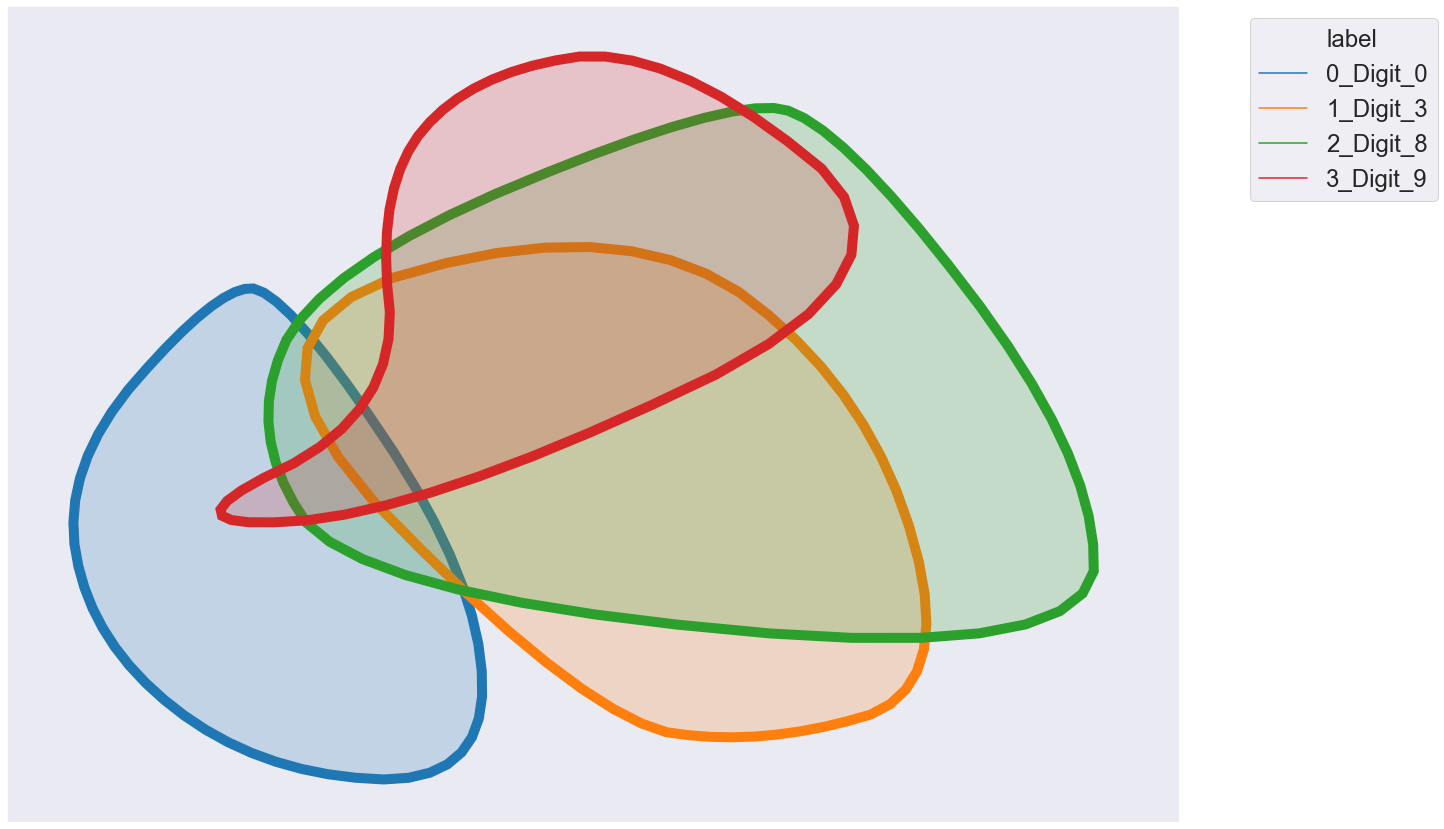

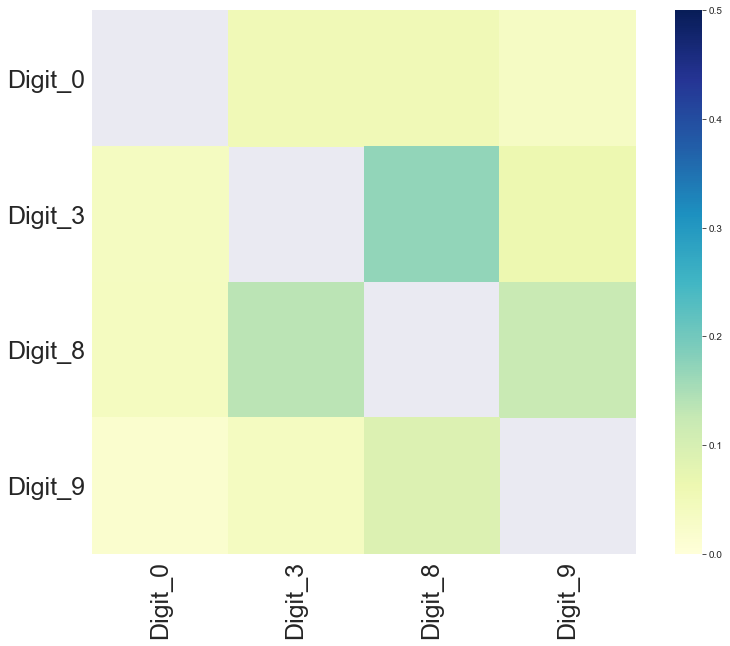

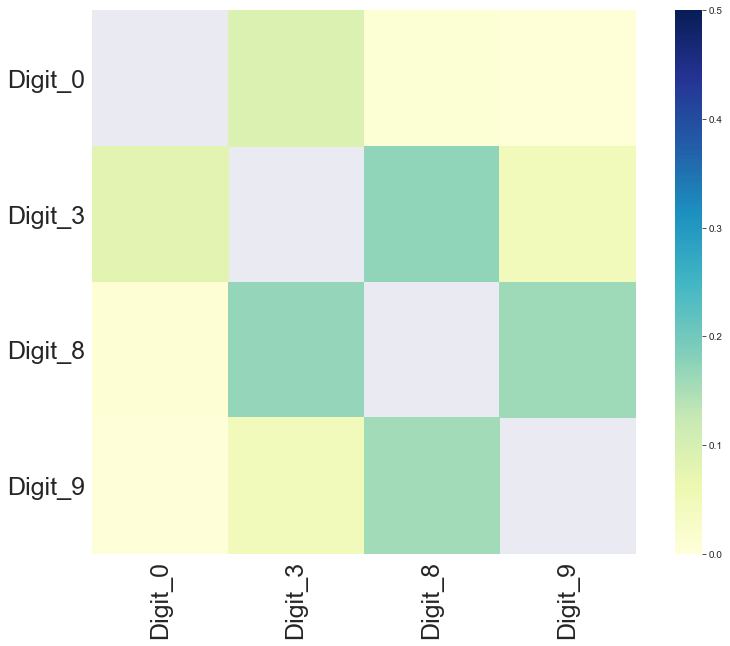

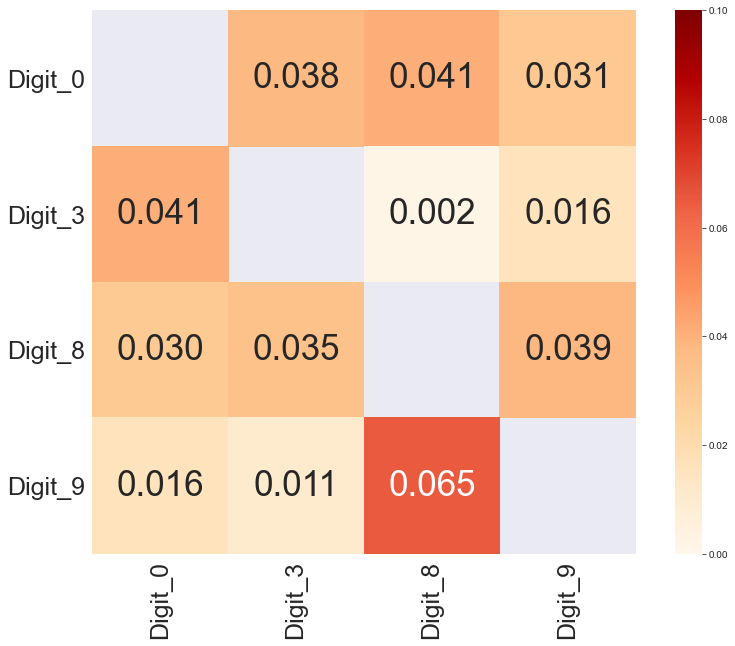

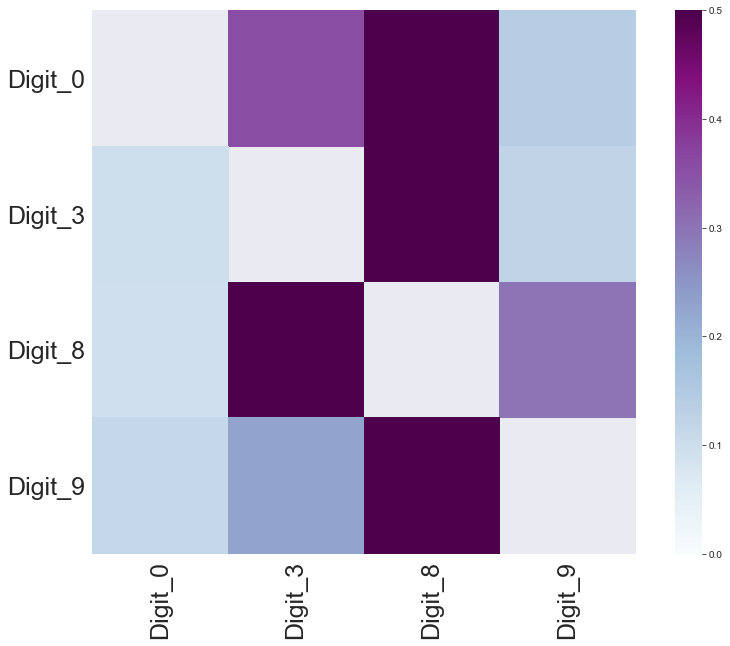

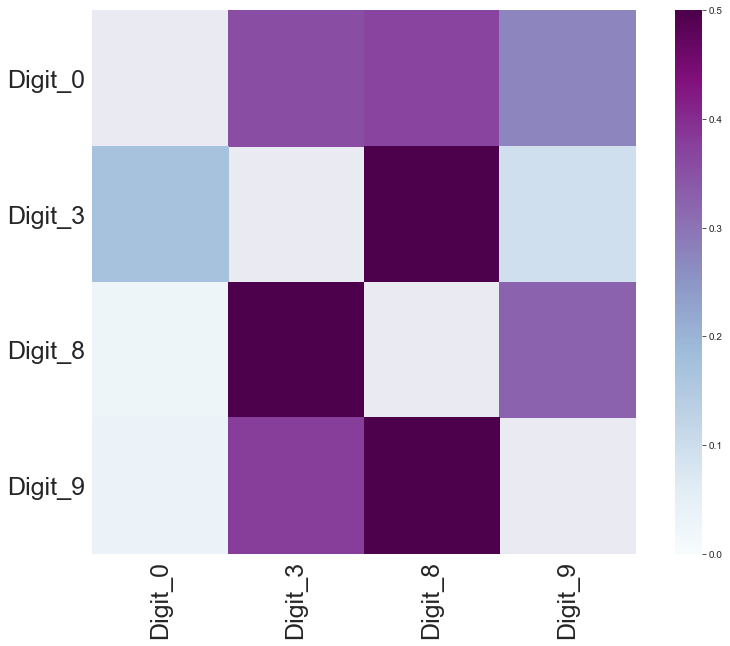

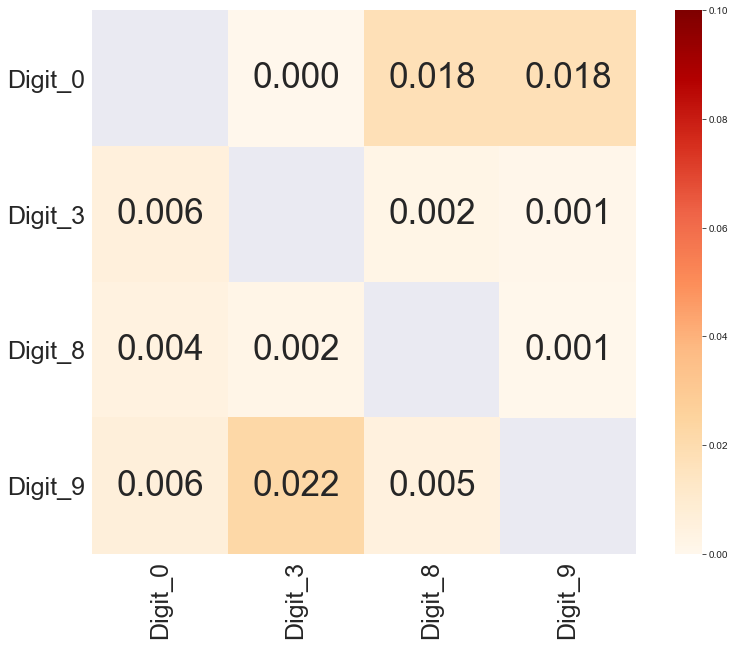

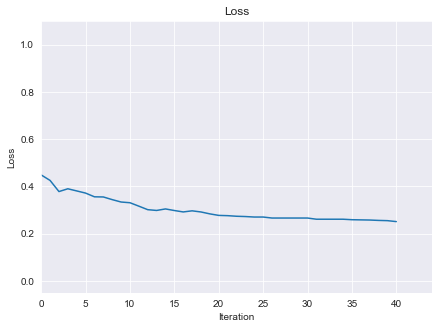

In [54]:
low_dim_32_ae_dim = dim_32_ae_amap.fit_transform(X_32_ae,y_32_ae)

# AE Dim 4

In [6]:
ds_ae_4 = DataSetFactory.get_dataset('MNIST_AE4', RANDOM_STATE)

In [7]:
X_4_ae = ds_ae_4.df[ds_ae_4.feature_cols].values
y_4_ae = ds_ae_4.df[ds_ae_4.label_col].values

(3973, 3973)
(6371648,)


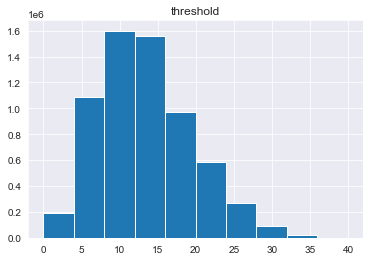

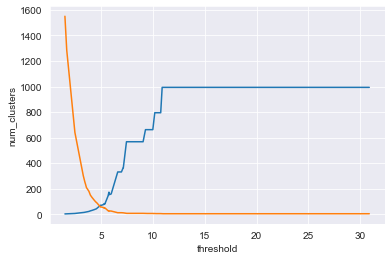

In [10]:
birch_threshold_plot(X_4_ae, ds_ae_4)

In [40]:
dim_4_ae_amap = AMAP(learning_rate=0.5, 
            n_iter=1, 
            batch_size=0,
            anchors_method='birch',
            birch_threshold=3,
            dataset='MNIST',
            class_to_label=ds_ae_4.class_to_label,
            show_fig=True,
            save_fig=True,
            k=200,
            random_state=RANDOM_STATE,
            save_fig_every=40,
            magnitude_step=True,
            top_greedy=1,
            show_anchors=False,
            supervised=False,
            alpha=[0.50,0.6,0.8,0.7],
            douglas_peucker_tolerance=0.5,
            smooth_iter=3,
            show_relations=True,
            show_inner_blobs=False,
            random_points_method='voronoi',
            annotate_images=False,
            only_inter_relations=False,
            mask_relation_in_same_label=True,
            show_label_level_plots=True)
print(dim_4_ae_amap)

AMAP
addr:@8aa548
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=3
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=200
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=1
magnitude_step=True
n_iter=1
batch_size=0
stop_criteria=1e-05
loss_func=<function AMAP.l_inf_loss at 0x0000021304217708>
loss='Linf'
only_inter_relations=False
learning_rate=0.5
mask_sparse_subcluster=None
random_points_method='voronoi'
class_to_label={0: 'Digit_0', 3: 'Digit_9', 1: 'Digit_3', 2: 'Digit_8'}
random_state=42
n_jobs=None
dataset='MNIST'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=[0.5, 0.6, 0.8, 0.7]
douglas_peucker_tolerance=0.5
smooth_iter=3
skip_polygons_with_area=0.01
show_relations=True
mask_relation_in_same_label=True
save_fig_every=40
show_points=False
show_anchors=False
show_p

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction only anchors
Dim Reduction only anchors - generate random points in low dim per anchor


100%|█████████████████████████████████████████████████████████████████████████████| 4185/4185 [00:21<00:00, 193.50it/s]


Starting iteration 1 loss = 0.5263254639920685
Skipping polygon of label 3 with area 0.00016719116717212046


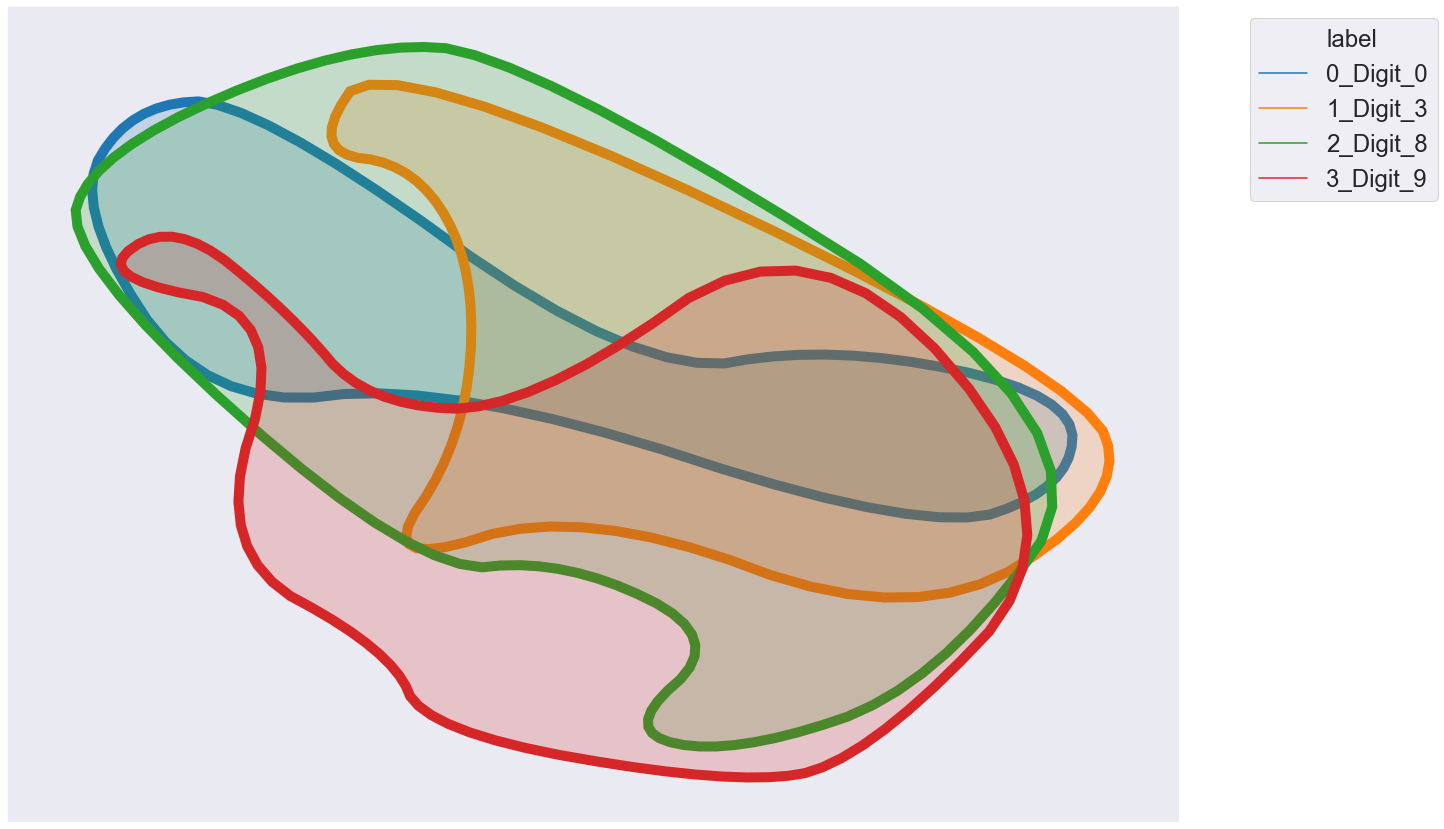

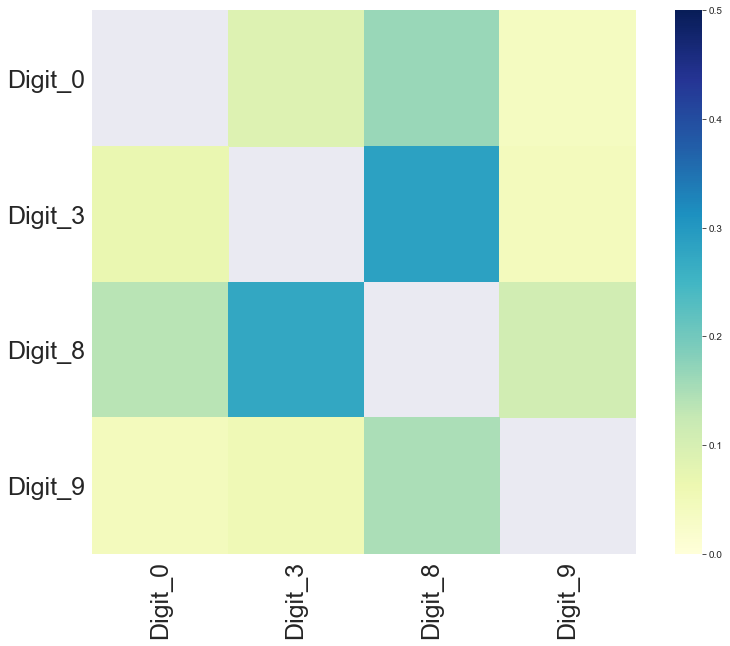

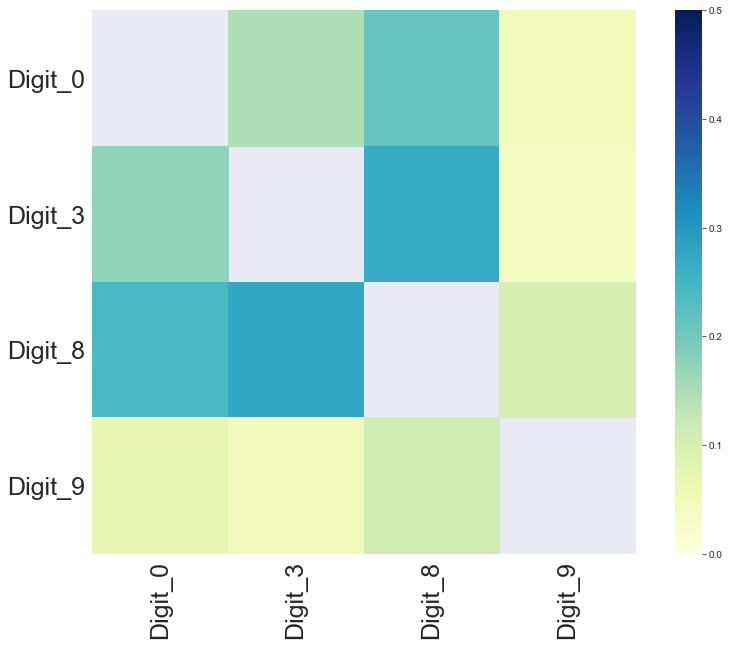

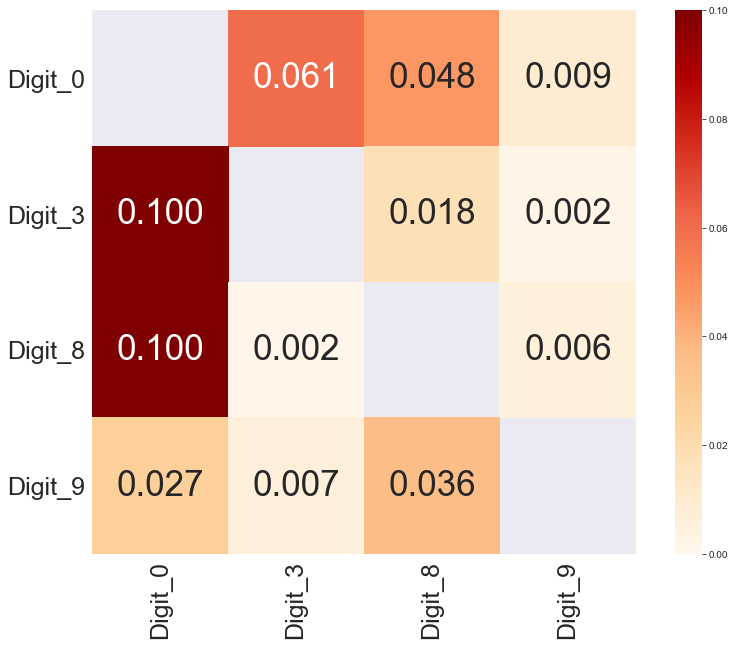

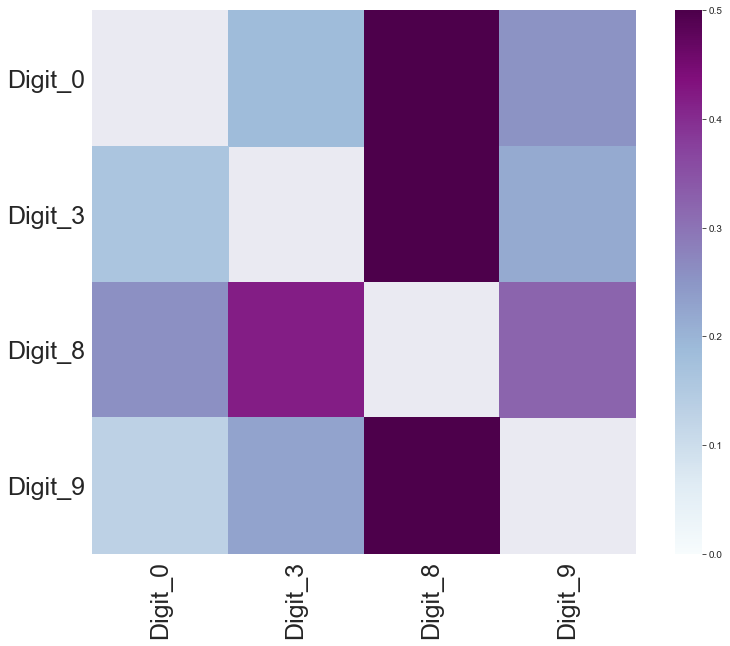

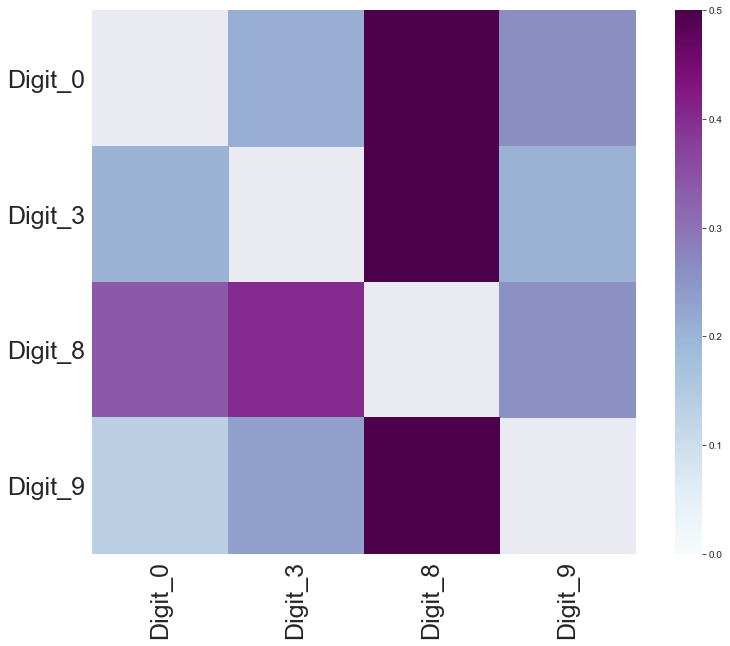

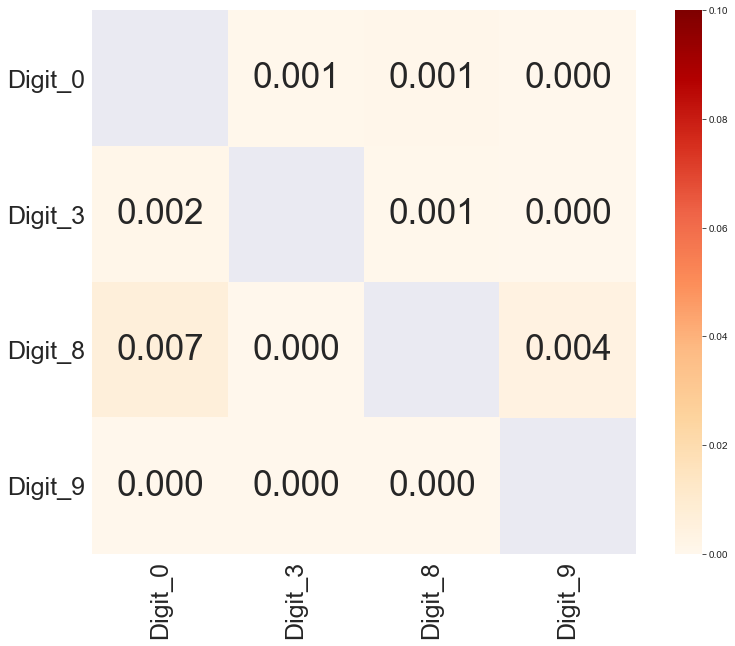

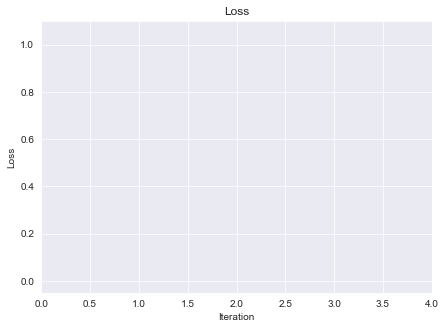

In [41]:
low_dim_4_ae_dim = dim_4_ae_amap.fit_transform(X_4_ae,y_4_ae)

In [16]:
dim_4_ae_amap.num_clusters_each_label, dim_4_ae_amap.num_clusters_each_label.sum()

(array([43, 43, 62, 64], dtype=int64), 212)

# Confusion Matrix

In [50]:
ds_orig_clf = DataSetFactory.get_dataset('MNIST_AE_ORIG', RANDOM_STATE)
ds_ae32_clf = DataSetFactory.get_dataset('MNIST_AE32', RANDOM_STATE)
ds_ae4_clf = DataSetFactory.get_dataset('MNIST_AE4', RANDOM_STATE)

In [57]:
X_orig_clf, y_orig_clf = ds_orig_clf.df[ds_orig_clf.feature_cols].values, ds_orig_clf.df[ds_orig_clf.label_col].values
X_ae32_clf, y_ae32_clf = ds_ae32_clf.df[ds_ae32_clf.feature_cols].values, ds_ae32_clf.df[ds_ae32_clf.label_col].values
X_ae4_clf, y_ae4_clf = ds_ae4_clf.df[ds_ae4_clf.feature_cols].values, ds_ae4_clf.df[ds_ae4_clf.label_col].values


In [52]:
K = 10

In [145]:
def plot_confusion_matrix(y_true, y_pred, ticks, cmap='Blues', normalize=True, annot=False):
    matrix = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    if normalize:
        matrix = matrix/matrix.sum(axis=1)[:,None]
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    g = sns.heatmap(matrix, ax=ax, annot=annot, fmt='.3f', square=True, cmap=cmap,
                    vmin=0, vmax=1, center=0.5,
                    xticklabels=[], yticklabels=ticks, annot_kws={"size": 26}, cbar=False)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    g.set_yticklabels(g.get_yticklabels(), rotation=0)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    ax.set_ylabel('True Label', fontsize=15)
    ax.set_xlabel('Predicted Label', fontsize=15)
    ax.set_title(f'Accuracy: {acc:.2f}' , fontsize=15)
    plt.show()
    
    print(acc)

In [146]:
def train_predict_plot_mat(X, y, ds, model, clf_args=None, fit_args = None, test_size=0.2):
    if clf_args is None:
        clf_args = {}
    if fit_args is None:
        fit_args = {}
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RANDOM_STATE)
    
    if model == 'knn':
        clf = KNeighborsClassifier(**clf_args)
    elif model == 'rf':
        clf = RandomForestClassifier(**clf_args)
    elif model == 'nn':
        
        np.random.seed(RANDOM_STATE)
        
        tf.random.set_seed(RANDOM_STATE)

        n_features = X_train.shape[1]
        # define model
        clf = Sequential()
        clf.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
        clf.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
        clf.add(Dense(len(np.unique(y_train)), activation='softmax'))
        # compile the model
        clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    clf.fit(X_train, y_train, **fit_args)
    y_predicted = clf.predict(X_test)
    
    if model == 'nn':
        y_predicted = np.argmax(y_predicted, axis=1)
    
    labels = [ds.class_to_label[i] for i in sorted(ds.class_to_label.keys())]
    plot_confusion_matrix(y_test, y_predicted, labels, annot=True)

## Orig Dim

Train on 3178 samples
Epoch 1/15
3178/3178 [==============================] - ETA: 1:16 - loss: 1.4120 - accuracy: 0.28 - ETA: 5s - loss: 1.3175 - accuracy: 0.3077 - ETA: 2s - loss: 1.2271 - accuracy: 0.40 - ETA: 1s - loss: 1.1330 - accuracy: 0.47 - ETA: 0s - loss: 1.0559 - accuracy: 0.55 - ETA: 0s - loss: 1.0035 - accuracy: 0.59 - ETA: 0s - loss: 0.9527 - accuracy: 0.63 - 1s 359us/sample - loss: 0.9064 - accuracy: 0.6649
Epoch 2/15
3178/3178 [==============================] - ETA: 0s - loss: 0.9118 - accuracy: 0.65 - ETA: 0s - loss: 0.5977 - accuracy: 0.83 - ETA: 0s - loss: 0.5958 - accuracy: 0.85 - ETA: 0s - loss: 0.5720 - accuracy: 0.86 - ETA: 0s - loss: 0.5588 - accuracy: 0.86 - ETA: 0s - loss: 0.5449 - accuracy: 0.87 - ETA: 0s - loss: 0.5377 - accuracy: 0.87 - ETA: 0s - loss: 0.5287 - accuracy: 0.88 - 0s 126us/sample - loss: 0.5230 - accuracy: 0.8845
Epoch 3/15
3178/3178 [==============================] - ETA: 0s - loss: 0.5612 - accuracy: 0.87 - ETA: 0s - loss: 0.4533 - accuracy:

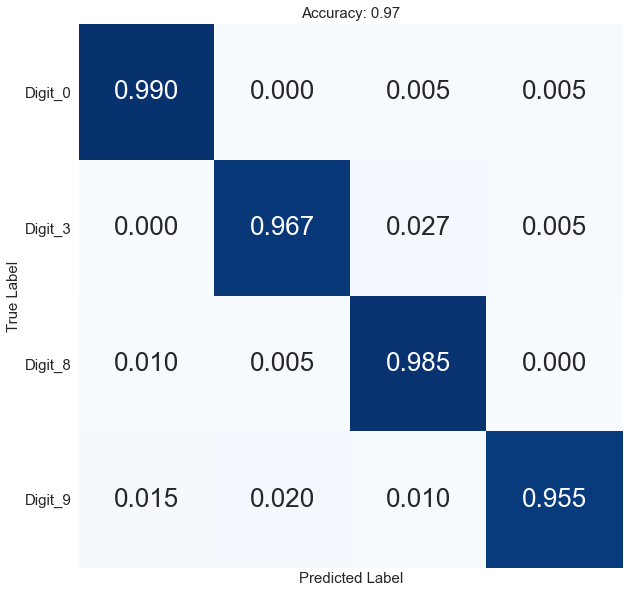

0.9748427672955975


In [147]:
train_predict_plot_mat(X_orig_clf, y_orig_clf, ds_orig_clf, 'nn', fit_args={'epochs':15, 'batch_size':32})

## AE 32

Train on 3178 samples
Epoch 1/15
3178/3178 [==============================] - ETA: 1:47 - loss: 3.7770 - accuracy: 0.28 - ETA: 4s - loss: 3.3013 - accuracy: 0.2895 - ETA: 2s - loss: 2.6867 - accuracy: 0.32 - ETA: 1s - loss: 2.4264 - accuracy: 0.33 - ETA: 0s - loss: 2.1705 - accuracy: 0.36 - ETA: 0s - loss: 2.0206 - accuracy: 0.36 - 1s 437us/sample - loss: 1.9570 - accuracy: 0.3704
Epoch 2/15
3178/3178 [==============================] - ETA: 0s - loss: 1.6668 - accuracy: 0.40 - ETA: 0s - loss: 1.3163 - accuracy: 0.42 - ETA: 0s - loss: 1.3011 - accuracy: 0.43 - ETA: 0s - loss: 1.2725 - accuracy: 0.45 - ETA: 0s - loss: 1.2564 - accuracy: 0.46 - ETA: 0s - loss: 1.2505 - accuracy: 0.47 - ETA: 0s - loss: 1.2383 - accuracy: 0.48 - 0s 110us/sample - loss: 1.2275 - accuracy: 0.4950
Epoch 3/15
3178/3178 [==============================] - ETA: 0s - loss: 1.1084 - accuracy: 0.53 - ETA: 0s - loss: 1.1267 - accuracy: 0.56 - ETA: 0s - loss: 1.1192 - accuracy: 0.57 - ETA: 0s - loss: 1.1037 - accuracy:

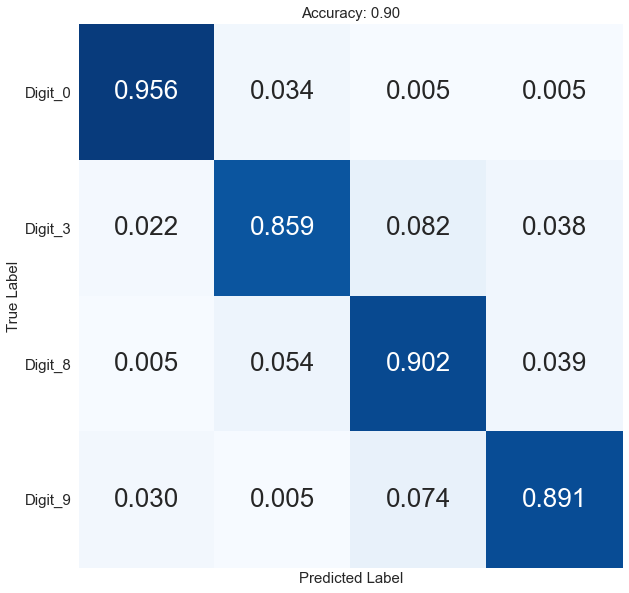

0.9031446540880503


In [148]:
train_predict_plot_mat(X_ae32_clf, y_ae32_clf, ds_ae32_clf, 'nn', fit_args={'epochs':15, 'batch_size':32})

## AE 4

Train on 3178 samples
Epoch 1/15
3178/3178 [==============================] - ETA: 59s - loss: 3.2893 - accuracy: 0.312 - ETA: 1s - loss: 3.7489 - accuracy: 0.275 - ETA: 0s - loss: 3.0193 - accuracy: 0.28 - ETA: 0s - loss: 2.6382 - accuracy: 0.27 - 1s 255us/sample - loss: 2.3802 - accuracy: 0.2753
Epoch 2/15
3178/3178 [==============================] - ETA: 0s - loss: 1.5289 - accuracy: 0.37 - ETA: 0s - loss: 1.4482 - accuracy: 0.32 - ETA: 0s - loss: 1.4055 - accuracy: 0.34 - ETA: 0s - loss: 1.3720 - accuracy: 0.35 - ETA: 0s - loss: 1.3557 - accuracy: 0.35 - 0s 69us/sample - loss: 1.3546 - accuracy: 0.3565
Epoch 3/15
3178/3178 [==============================] - ETA: 0s - loss: 1.2823 - accuracy: 0.40 - ETA: 0s - loss: 1.2877 - accuracy: 0.39 - ETA: 0s - loss: 1.2822 - accuracy: 0.39 - ETA: 0s - loss: 1.2704 - accuracy: 0.40 - ETA: 0s - loss: 1.2586 - accuracy: 0.41 - 0s 78us/sample - loss: 1.2478 - accuracy: 0.4191
Epoch 4/15
3178/3178 [==============================] - ETA: 0s - loss:

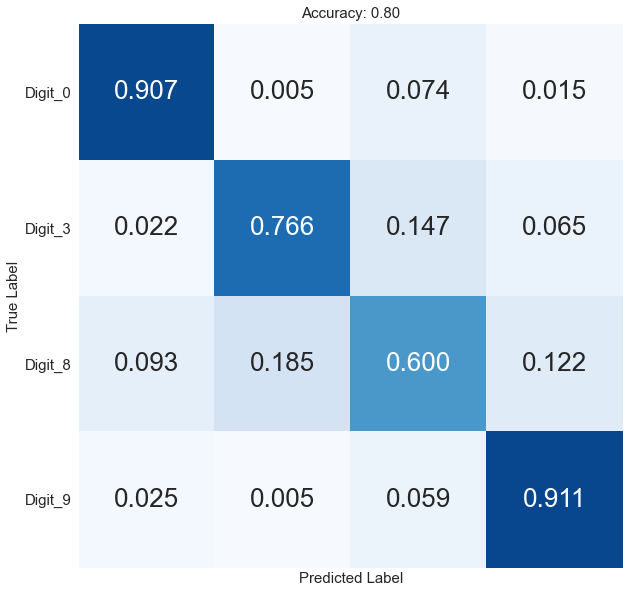

0.7962264150943397


In [149]:
train_predict_plot_mat(X_ae4_clf, y_ae4_clf, ds_ae4_clf, 'nn', fit_args={'epochs':15, 'batch_size':32})